<a href="https://colab.research.google.com/github/MubasshirNaib/Machine-learning/blob/main/MLTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
dataset1=pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
dataset2=pd.read_csv('/content/IPL_Matches_2008_2022.csv')
print(dataset1.head())


        ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0     

In [14]:
print(dataset2.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

1. Find the highest wicket taker in any particular season

In [28]:
# Merge match and ball-by-ball data to include season information
merged_df = dataset1.merge(dataset2[['ID', 'Season']], left_on='ID', right_on='ID')

wickets_df = merged_df[merged_df['kind'].notnull()]


# Group by season and bowler to count wickets
wickets_count = wickets_df.groupby(['Season', 'bowler']).size().reset_index(name='wickets')
# Find the bowler with the highest wickets for each season
highest_wicket_taker = wickets_count.loc[wickets_count.groupby('Season')['wickets'].idxmax()]
# print("Highest wicket taker in each season:")
# print(highest_wicket_taker)
season=input("Enter the Season: ")
k=highest_wicket_taker[highest_wicket_taker['Season']==season]
print(k)





Enter the Season: 2012
    Season    bowler  wickets
447   2012  M Morkel       30


2. Find out the name of the player:
- faced highest number of deliveries in the history of IPL
- hit highest number of sixes in the history of IPL
- taken highest number of catches in the history of IPL
- taken highest number of LBW wickets in the history of IPL

In [53]:
highest_deliveries = dataset1.groupby('batter')['ballnumber'].count().idxmax()
print(f"The player who faced the highest number of deliveries: {highest_deliveries}")
# # Faced highest number of deliveries
# deliveries_faced = dataset1.groupby('batter')['ballnumber'].size().reset_index()
# max_deliveries = deliveries_faced['ballnumber'].max()
# player_with_max_deliveries = deliveries_faced.loc[deliveries_faced['ballnumber'] == max_deliveries]
# print(player_with_max_deliveries['ballnumber'])



The player who faced the highest number of deliveries: V Kohli


In [40]:
highest_sixes = dataset1[dataset1['batsman_run'] == 6].groupby('batter').size().idxmax()
print(f"The player who hit the highest number of sixes: {highest_sixes}")


The player who hit the highest number of sixes: CH Gayle


In [43]:
highest_catches = dataset1[dataset1['kind'] == 'caught'].groupby('fielders_involved').size().idxmax()
print(f"The player who took the highest number of catches: {highest_catches}")


The player who took the highest number of catches: MS Dhoni


In [44]:
highest_lbw_wickets = dataset1[dataset1['kind'] == 'lbw'].groupby('bowler').size().idxmax()
print(f"The player who took the highest number of LBW wickets: {highest_lbw_wickets}")


The player who took the highest number of LBW wickets: Rashid Khan


3. Find highest run getters in each of the seasons (2008-2022) and amount of his run.
And plot a suitable chart indicating this information using matplotlib.

Highest run getters in each season:
       Season         batter  batsman_run
115   2007/08       SE Marsh          616
229      2009      ML Hayden          572
446   2009/10   SR Tendulkar          618
502      2011       CH Gayle          608
684      2012       CH Gayle          733
910      2013     MEK Hussey          733
1088     2014     RV Uthappa          660
1148     2015      DA Warner          562
1383     2016        V Kohli          973
1422     2017      DA Warner          641
1594     2018  KS Williamson          735
1694     2019      DA Warner          692
1866  2020/21       KL Rahul          676
2051     2021     RD Gaikwad          635
2144     2022     JC Buttler          863


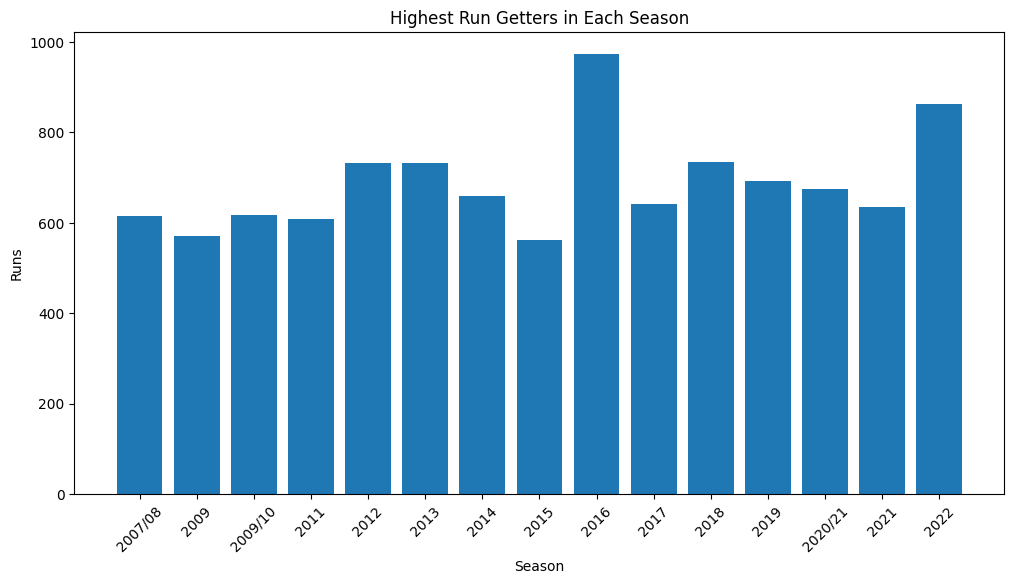

In [57]:
# Group by season and batsman to sum runs
season_run_getters = merged_df.groupby(['Season', 'batter'])['batsman_run'].sum().reset_index()

# Find the highest run getter for each season
highest_run_getter_per_season = season_run_getters.loc[season_run_getters.groupby('Season')['batsman_run'].idxmax()]

print("Highest run getters in each season:")
print(highest_run_getter_per_season)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(highest_run_getter_per_season['Season'], highest_run_getter_per_season['batsman_run'])
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Highest Run Getters in Each Season')
plt.xticks(rotation=45)
plt.show()


4.Find the top 5 batsmen in the history of IPL based on strike rate (optional)

In [61]:
# Calculate strike rate for each batsman
batsman_stats = dataset1.groupby('batter').agg({'ballnumber': 'count', 'batsman_run': 'sum'})
batsman_stats['strike_rate'] = (batsman_stats['batsman_run'] / batsman_stats['ballnumber']) * 100

# Filter out batsmen who faced less than 50 balls
batsman_stats = batsman_stats[batsman_stats['ballnumber'] >= 50]

# Find top 5 batsmen based on strike rate
top_5_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(5)
print("Top 5 batsmen based on strike rate:")
print(top_5_batsmen)


Top 5 batsmen based on strike rate:
              ballnumber  batsman_run  strike_rate
batter                                            
TH David              94          187   198.936170
LJ Wright             63          106   168.253968
AD Russell          1212         2039   168.234323
KK Cooper             70          116   165.714286
Kamran Akmal          78          128   164.102564
